In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Shoe_sales_raw-data.csv')

In [4]:
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [5]:
df.shape

(14967, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   Shop           14967 non-null  object 
 5   Gender         14967 non-null  object 
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  object 
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  int64  
 10  Discount       14967 non-null  float64
 11  Year           14967 non-null  int64  
 12  Month          14967 non-null  int64  
 13  SalePrice      14967 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB


In [23]:
df.columns

Index(['InvoiceNo', 'Date', 'Country', 'ProductID', 'Shop', 'Gender',
       'Size (US)', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount',
       'Year', 'Month', 'SalePrice'],
      dtype='object')

In [25]:
plotlist = df[['Date', 'Country', 'ProductID', 'Shop', 'Gender', 'Size (US)', 'SalePrice']]

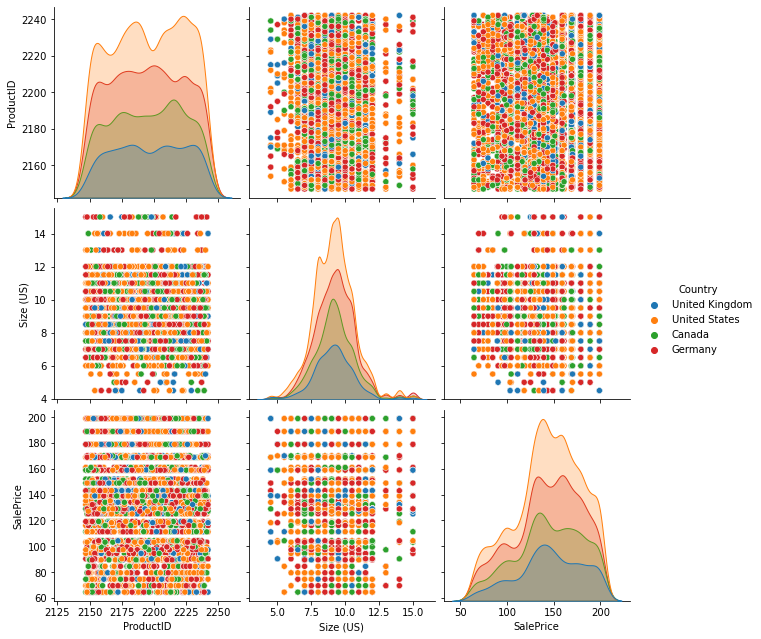

In [27]:
sns.pairplot(plotlist, hue='Country', height=3);

## It appears shoe size and possibly sale price follow a normal distribution, let's investigate

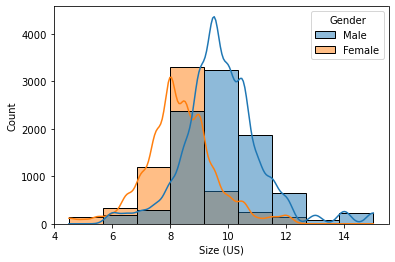

In [19]:
sns.histplot(x='Size (US)', data=df, bins=9, hue='Gender', kde=True);

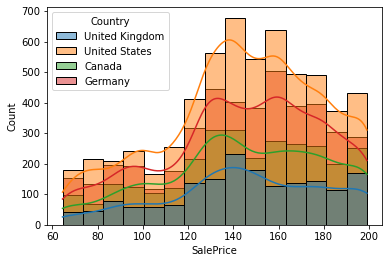

In [28]:
sns.histplot(x='SalePrice', data=df, bins=15, hue='Country', kde=True);

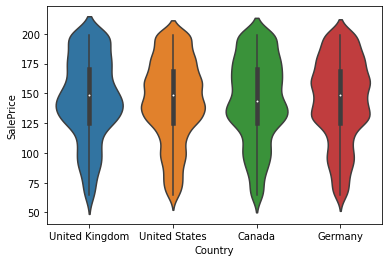

In [29]:
# Let's see how sales price is distributed accross countries

sns.violinplot(x='Country', y='SalePrice', data=df);

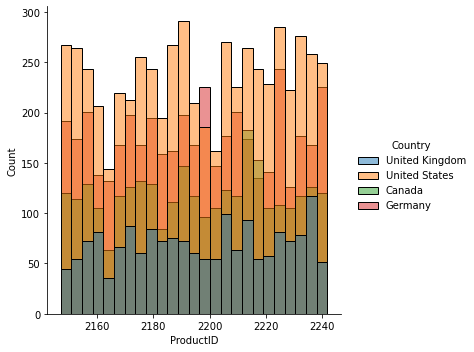

In [34]:
sns.displot(df, x='ProductID', hue='Country');

It appears that Germany has only one product ID sold ???

In [35]:
dfGer = df[df['Country'] == 'Germany']
dfGer

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
6,52395,1/2/2014,Germany,2200,GER2,Female,9.0,39-40,7.0,179,0.0,2014,1,179.0
14,52401,1/3/2014,Germany,2235,GER1,Male,10.5,43-44,10.0,169,0.5,2014,1,84.5
15,52401,1/3/2014,Germany,2197,GER1,Female,8.5,39,6.5,179,0.2,2014,1,143.2
24,52408,1/4/2014,Germany,2206,GER2,Male,8.5,41-42,8.0,149,0.2,2014,1,119.2
25,52409,1/4/2014,Germany,2157,GER2,Male,12.0,45,11.5,149,0.2,2014,1,119.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14953,65764,12/30/2016,Germany,2214,GER2,Female,7.0,37-38,5.0,179,0.5,2016,12,89.5
14957,65768,12/31/2016,Germany,2205,GER1,Female,7.5,38,5.5,159,0.0,2016,12,159.0
14958,65769,12/31/2016,Germany,2210,GER2,Male,10.5,43-44,10.0,179,0.5,2016,12,89.5
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0


In [43]:
dfGer['ProductID'].value_counts()

2197    69
2179    69
2225    69
2172    69
2241    69
        ..
2230    27
2219    24
2162    21
2155    21
2235    21
Name: ProductID, Length: 96, dtype: int64

Yet when we look further we see it is not the case

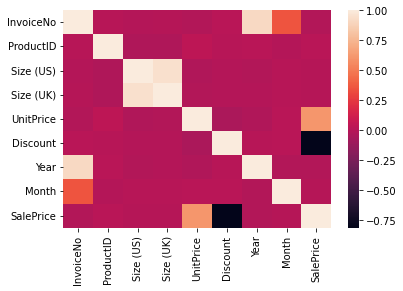

In [42]:
# Let's see how different features are correlated

sns.heatmap(df.corr());

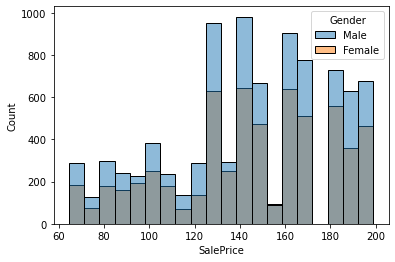

In [47]:
sns.histplot(x='SalePrice', data=df, bins=20, hue='Gender');

It appears that Men purchase more higher priced shoes 

In [61]:
dfMens = df[df['Gender'] == 'Male']
dfWomens = df[df['Gender'] == 'Female']

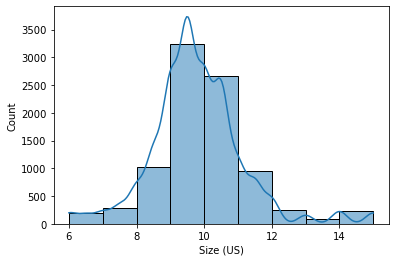

In [18]:
sns.histplot(x='Size (US)', data=dfMens, bins=9, kde=True);

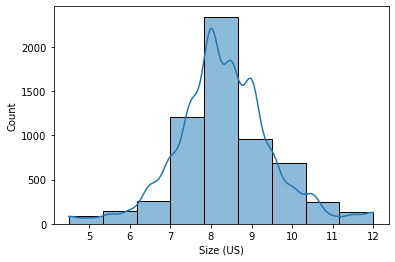

In [30]:
sns.histplot(x='Size (US)', data=dfWomens, bins=9, kde=True);

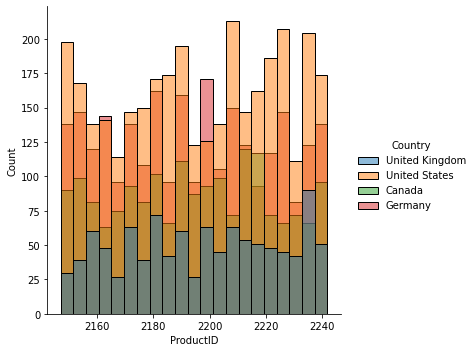

In [62]:
sns.displot(dfMens, x='ProductID', hue='Country');

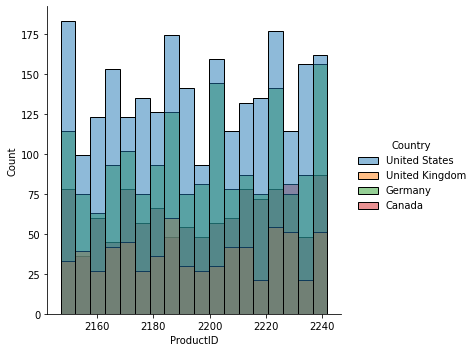

In [63]:
sns.displot(dfWomens, x='ProductID', hue='Country');

## Now let's look at sales over time

In [48]:
dft = df.groupby('Month').SalePrice.sum()

In [49]:
dfm = dft.to_frame()

In [57]:
dfm.reset_index(inplace=True)

In [58]:
dfm.head()

,Month,SalePrice
0,1,152992.8
1,2,151576.2
2,3,156948.1
3,4,171327.7
4,5,180688.1


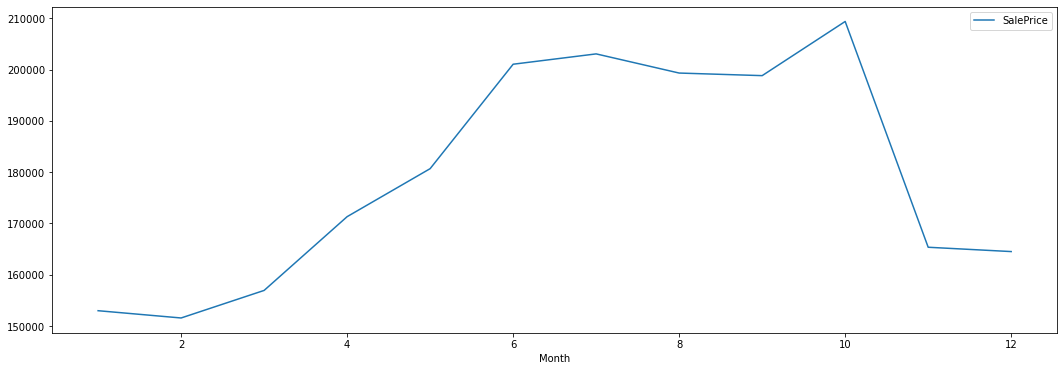

In [60]:
dfm.plot(x='Month', y='SalePrice', figsize=(18,6));

## It appears that we have some seasonality here. The next step is time series forecasting through machine learning